# Random Forest 

In [1]:

# Author: Arnova Abdullah
# Date: 15-05-2022
# Description: Code for creating and evaluating Random Forest Model for stratified training set(using acousticness_cat)


## Importing modules

In [2]:
# Run this cell to import the following modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing modules for Random Forest evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc

In [4]:
# Importing modules for performance evaluation

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

## Loading data 

In [7]:
# Loading training data set
df_a_train = pd.read_csv('data/acousticness_train.csv')
df_a_train.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,0.546622,0.612379,-8.960586,0.665729,0.065160,0.308117,0.186712,0.188602,0.464515,120.150775,3.903021
std,0.166260,0.277470,6.568204,0.471760,0.062292,0.351312,0.335408,0.164115,0.248829,29.648310,0.401932
min,0.060800,0.000707,-44.761000,0.000000,0.022400,0.000002,0.000000,0.009670,0.024100,40.645000,1.000000
25%,0.442000,0.432750,-10.287250,0.000000,0.034200,0.012600,0.000000,0.094700,0.263750,97.012000,4.000000
50%,0.557000,0.673000,-6.826000,1.000000,0.043900,0.129000,0.000131,0.120000,0.460000,120.035500,4.000000
75%,0.663000,0.843000,-4.873750,1.000000,0.066125,0.593000,0.140000,0.228000,0.656000,138.015000,4.000000
max,0.982000,0.999000,2.098000,1.000000,0.867000,0.996000,0.993000,0.992000,0.981000,213.087000,5.000000


In [9]:
df_a_train.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.174,0.742,-5.930,1,0.0485,0.00181,0.28100,0.1980,0.360,163.378,4,pop
1,0.731,0.675,-5.134,0,0.0434,0.00473,0.00000,0.1410,0.298,124.939,4,pop
2,0.339,0.951,-5.150,1,0.0370,0.00272,0.00537,0.3220,0.892,159.281,4,pop
3,0.445,0.544,-10.925,1,0.0314,0.69800,0.47700,0.1150,0.222,101.172,4,blues
4,0.733,0.261,-14.560,1,0.0496,0.49400,0.04120,0.0581,0.622,91.276,4,acoustic


In [8]:
df_a_test = pd.read_csv ('data/acousticness_test.csv')
df_a_test.describe ()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,0.542820,0.611039,-9.102820,0.678333,0.064923,0.306752,0.185980,0.192986,0.457715,119.685119,3.909167
std,0.165457,0.281432,6.847381,0.467213,0.065410,0.352067,0.336079,0.173703,0.246245,29.694790,0.410471
min,0.061700,0.001100,-47.898000,0.000000,0.023800,0.000001,0.000000,0.021000,0.028700,35.995000,0.000000
25%,0.439000,0.427000,-10.464000,0.000000,0.034000,0.011775,0.000000,0.093900,0.258000,96.078000,4.000000
50%,0.553000,0.677500,-6.768000,1.000000,0.043800,0.126500,0.000112,0.120000,0.451000,119.979500,4.000000
75%,0.658000,0.846250,-4.900750,1.000000,0.066225,0.587250,0.134000,0.234000,0.642000,138.186250,4.000000
max,0.967000,0.999000,-0.751000,1.000000,0.926000,0.996000,0.987000,0.991000,0.981000,210.857000,5.000000


In [10]:
df_a_test.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.589,0.14600,-14.619,1,0.0772,0.9890,0.948000,0.1110,0.537,119.982,4,acoustic
1,0.627,0.69900,-4.504,1,0.0244,0.1740,0.000000,0.0789,0.535,94.003,4,rock
2,0.694,0.77900,-6.984,1,0.0710,0.0688,0.000004,0.0803,0.594,84.975,4,country
3,0.407,0.00649,-26.590,1,0.0454,0.9940,0.876000,0.0773,0.186,83.061,4,classical
4,0.755,0.46200,-13.017,0,0.0504,0.0715,0.910000,0.1090,0.680,100.007,4,techno


## Picking out important features

In [11]:
# Keeping columns energy, loudness, acousticness and instrumentalness, dropping the rest
columns = ['danceability', 'mode', 'liveness', 'speechiness', 'valence', 'tempo', 'time_signature', 'genre']
X_train = df_a_train.drop(columns, axis=1)
y_train, levels = pd.factorize(df_a_train['genre']) # Encoding categorical data to numeric categories

In [12]:
# Keeping columns energy, loudness, acousticness and instrumentalness, dropping the rest
columns = ['danceability', 'mode', 'liveness', 'speechiness', 'valence', 'tempo', 'time_signature', 'genre']
X_test = df_a_test.drop(columns, axis=1)
y_test, levels = pd.factorize(df_a_test['genre']) # Encoding categorical data to numeric categories

## Training the model using Random Forest

In [13]:
# Using OneVsRestClassifier to train training set
model = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
model.fit (X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=0.2))

## Performance evaluation

### 1. Accuracy Score measurement (Training set)

In [14]:
y_train_pred = model.predict (X_train)
train_accuracy = accuracy_score (y_true = y_train, y_pred = y_train_pred)
train_accuracy

0.9222916666666666

### 2. Accuracy Score measurement (Test set)

In [15]:
y_test_pred = model.predict (X_test)
test_accuracy = accuracy_score (y_true = y_test, y_pred = y_test_pred)
test_accuracy

0.07708333333333334

### 3. Confusion matrix evaluation

In [16]:
print(confusion_matrix(y_train, y_train_pred))

[[724   8   0   1   0   5 100 109   1   1]
 [  2 905  21   2   0   5  21   0  11   0]
 [  0  14 938   0   0   0   2   1   0   0]
 [  2   2   0 933   0   0  29   3   0   0]
 [  0   2   0   0 956   1   0   0   0   0]
 [  3   2   0   2   0 898  36   1   0   0]
 [ 92  41   4  35   0  62 724  14   0   0]
 [ 76   0   1   0   0   1  11 861   0   3]
 [  0  12   0   0   3   0   0   0 948   0]
 [  0   0   0   0   1   0   0   3   0 967]]


<AxesSubplot:xlabel='col_0', ylabel='row_0'>

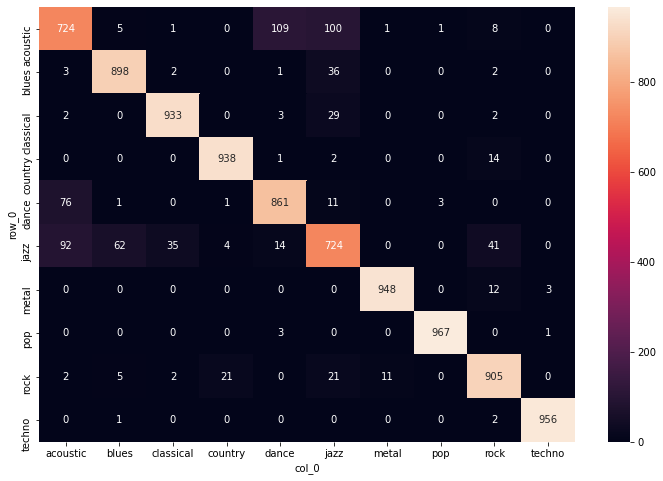

In [17]:
cf_matrix = pd.crosstab(levels[y_train],levels[y_train_pred])
plt.figure(figsize=(12,8))
heatmap(cf_matrix, annot=True, fmt='g')

### 4. Cross validation

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [19]:
cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')

array([0.38625 , 0.37625 , 0.376875])